# Sorting

In [1]:
import numpy as np

In [2]:
#O(n^2)
def selection_sort(x):
    for i in range(len(x)):
        # starting at pos i,
        # find the index of the minimum
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
        return x

In [3]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 4, 3, 5])

In [8]:
#O(n*n!)
def bogo_sort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [4]:
x[:-1]

array([1, 2, 4, 3])

In [5]:
x[1:]

array([2, 4, 3, 5])

In [6]:
x[:-1] > x[1:]

array([False, False,  True, False])

we compare every element with the next one. We see that 4 is smaller than 3, which is where a mismatch occurs.

In [9]:
bogo_sort(x)

array([1, 2, 3, 4, 5])

## Numpy sorting
By default np.sort uses quicksort, though mergesort and heapsort are also available.

In [17]:
x = np.array([2,1,4,3,5])

In [18]:
np.sort(x)

array([1, 2, 3, 4, 5])

In [19]:
x.sort()
x

array([1, 2, 3, 4, 5])

argsort returns the indexes of the sorted elements:

In [21]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [22]:
x[i]

array([1, 2, 3, 4, 5])

## N-D sorting

In [30]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [33]:
np.sort(X) #  columns are default for 2D (probably highest axis)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [34]:
np.sort(X, axis=1) # sort each row

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [35]:
np.sort(X, axis=0) # sort each column

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

## Partitioning
finding the k smallest values

find the 3 smallest values and put them in the front. All there rest will follow in an arbitrary order.

In [37]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [38]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example: kNN

In [85]:
N = 10
X = rand.rand(N,2)
X

array([[0.42340148, 0.39488152],
       [0.29348817, 0.01407982],
       [0.1988424 , 0.71134195],
       [0.79017554, 0.60595997],
       [0.92630088, 0.65107703],
       [0.91495968, 0.85003858],
       [0.44945067, 0.09541012],
       [0.37081825, 0.66884125],
       [0.66592236, 0.59129779],
       [0.27472179, 0.56124343]])

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

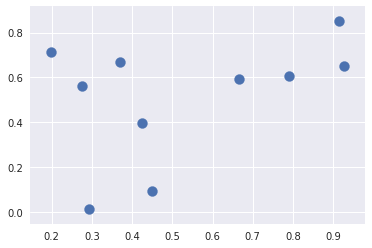

In [87]:
plt.scatter(X[:,0], X[:,1], s=100);

In [88]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [89]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [90]:
dist_sq = sq_differences.sum(axis=-1)
dist_sq.shape

(10, 10)

In [91]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [92]:
dist_sq

array([[0.        , 0.1618874 , 0.15057399, 0.17907733, 0.31854394,
        0.44879741, 0.09036168, 0.07781893, 0.09739573, 0.04978193],
       [0.1618874 , 0.        , 0.4951323 , 0.59702045, 0.80621735,
        1.08505387, 0.03093892, 0.43469247, 0.4718878 , 0.29974019],
       [0.15057399, 0.4951323 , 0.        , 0.36078024, 0.53282769,
        0.5320607 , 0.44217653, 0.031382  , 0.23257428, 0.02828725],
       [0.17907733, 0.59702045, 0.36078024, 0.        , 0.02056566,
        0.07514544, 0.37675459, 0.17981459, 0.01565383, 0.26769214],
       [0.31854394, 0.80621735, 0.53282769, 0.02056566, 0.        ,
        0.03971432, 0.53615183, 0.30887652, 0.07137053, 0.43262538],
       [0.44879741, 1.08505387, 0.5320607 , 0.07514544, 0.03971432,
        0.        , 0.78616274, 0.32892236, 0.12896638, 0.49330719],
       [0.09036168, 0.03093892, 0.44217653, 0.37675459, 0.53615183,
        0.78616274, 0.        , 0.33500633, 0.29276457, 0.24753085],
       [0.07781893, 0.43469247, 0.031382 

In [93]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 9, 7, 6, 8, 2, 1, 3, 4, 5],
       [1, 6, 0, 9, 7, 8, 2, 3, 4, 5],
       [2, 9, 7, 0, 8, 3, 6, 1, 5, 4],
       [3, 8, 4, 5, 0, 7, 9, 2, 6, 1],
       [4, 3, 5, 8, 7, 0, 9, 2, 6, 1],
       [5, 4, 3, 8, 7, 0, 9, 2, 6, 1],
       [6, 1, 0, 9, 8, 7, 3, 2, 4, 5],
       [7, 9, 2, 0, 8, 3, 4, 5, 6, 1],
       [8, 3, 4, 7, 0, 5, 9, 2, 6, 1],
       [9, 7, 2, 0, 8, 6, 3, 1, 4, 5]])

In [94]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1) #K+1 for element itself
nearest_partition #note that these are NOT ordered!

array([[0, 9, 7, 6, 8, 3, 2, 1, 4, 5],
       [1, 0, 6, 9, 3, 5, 2, 7, 8, 4],
       [7, 9, 2, 0, 1, 5, 6, 3, 8, 4],
       [8, 3, 4, 5, 0, 1, 6, 7, 2, 9],
       [3, 5, 4, 8, 7, 0, 6, 1, 2, 9],
       [3, 5, 4, 8, 7, 0, 6, 1, 2, 9],
       [1, 0, 6, 9, 3, 5, 2, 7, 8, 4],
       [7, 9, 2, 0, 1, 5, 6, 3, 8, 4],
       [8, 3, 4, 7, 0, 5, 6, 1, 2, 9],
       [7, 9, 2, 0, 1, 5, 6, 3, 8, 4]])

let's visualize

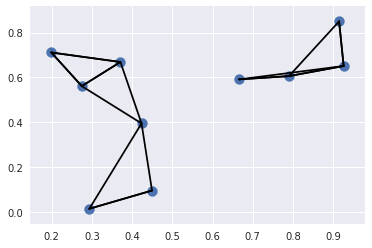

In [95]:
plt.scatter(X[:, 0], X[:, 1], s=100)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

### Difference explained
Let's calculate the difference between two points

In [112]:
p1 = X[0]
p1

array([0.42340148, 0.39488152])

In [113]:
p2 = X[1]
p2

array([0.29348817, 0.01407982])

In [114]:
p1 - p2

array([0.12991331, 0.3808017 ])

In [115]:
(p1 - p2) ** 2

array([0.01687747, 0.14500993])

In [117]:
np.sum((p1 - p2) ** 2)

0.161887398338398

In [118]:
np.sqrt(np.sum((p1 - p2) ** 2))

0.40235233109601587

there we go, done!  
Now let's scale this up to multiple points:

In [121]:
all_points = np.array([p1, p2])
all_points

array([[0.42340148, 0.39488152],
       [0.29348817, 0.01407982]])

This is a 2D list: a list of coordinates.  
We add one more dimension:

In [154]:
m1 = all_points[:, np.newaxis, :] # last colon can be omitted
m1

array([[[0.42340148, 0.39488152]],

       [[0.29348817, 0.01407982]]])

In [155]:
m1.shape

(2, 1, 2)

This looks like:

|  | 0 | 1 |
| --- | --- | --- |
| 0 | p1 | ?? |
| 1 | p2 | ?? |

In [152]:
m2 = all_points[np.newaxis, :, :] # last colon can be omitted
m2

array([[[0.42340148, 0.39488152],
        [0.29348817, 0.01407982]]])

In [153]:
m2.shape

(1, 2, 2)

This looks like:

|  | 0 | 1 |
| --- | --- | --- |
| 0 | p1 | p2 |
| 1 | ?? | ?? |

due to broadcasting rules, both will be blown up:

m1:

|  | 0 | 1 |
| --- | --- | --- |
| 0 | p1 | p1 |
| 1 | p2 | p2 |

and m2:

|  | 0 | 1 |
| --- | --- | --- |
| 0 | p1 | p2 |
| 1 | p1 | p2 |

In [163]:
result = (m1 - m2)
result.shape

(2, 2, 2)

In [164]:
result

array([[[ 0.        ,  0.        ],
        [ 0.12991331,  0.3808017 ]],

       [[-0.12991331, -0.3808017 ],
        [ 0.        ,  0.        ]]])

We find the correct differences, now let's square them

In [165]:
result ** 2

array([[[0.        , 0.        ],
        [0.01687747, 0.14500993]],

       [[0.01687747, 0.14500993],
        [0.        , 0.        ]]])

and sum them up using the inner axis

In [168]:
np.sum(result ** 2, axis=-1)

array([[0.       , 0.1618874],
       [0.1618874, 0.       ]])

and take the square root:

In [169]:
np.sqrt(np.sum(result ** 2, axis=-1))

array([[0.        , 0.40235233],
       [0.40235233, 0.        ]])

Note that the square root is often dropped as we are mainly interested in the relative distances, which remains unchanges after a sqrt operation.

### zip explained

In [100]:
X[0]

array([0.42340148, 0.39488152])

In [101]:
X[1]

array([0.29348817, 0.01407982])

In [104]:
list(zip(X[0], X[1])) # we get a list of x-values and a list of y-values

[(0.4234014807063696, 0.2934881747180381),
 (0.3948815181755697, 0.014079822715084456)]

the * operator unpacks the list and passed the x and y lists as separate arguments to the function (plot in this case)